In [1]:
import sys
sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.cluster import HDBSCAN, KMeans
import igraph as ig

from karateclub import FeatherGraph, Graph2Vec

import json
from utils.graph_utils import get_all_user_graphs, get_all_sentiment_user_graphs

In [2]:
# General settings
plt.rcParams.update({
#   'text.usetex': True,                # Use LaTeX for all text
    'font.family': 'serif',             # Serif font (default for LaTeX)
    'font.size': 10,                    # Font size
    'axes.titlesize': 12,               # Title size
    'axes.labelsize': 10,               # Axis label size
    'legend.fontsize': 8,               # Legend font size
    'xtick.labelsize': 8,               # Tick label size
    'ytick.labelsize': 8,               # Tick label size
    'figure.dpi': 300,                  # High resolution
    'savefig.dpi': 300,                 # Save figures with high resolution
    'savefig.format': 'pgf',            # Default save format
    'axes.linewidth': 0.75,             # Line width for axes
    'legend.frameon': True,             # Remove legend frame
    'legend.framealpha': 1,             # Legend opacity
})

# Seaborn settings
sns.set_theme(style="whitegrid")        # Clean grid for academic style

In [3]:
graphs = get_all_sentiment_user_graphs()
graphs = [g.components(mode='weak').giant() for g in graphs]
graphs_nx = [g.simplify().to_networkx() for g in graphs]

categories = [g['category'] for g in graphs]
names = [g['name'] for g in graphs]

### FeatherGraph

In [4]:
model = FeatherGraph()
model.fit(graphs_nx)
embs = model.get_embedding()
embs_pca = PCA(n_components=2).fit_transform(embs)
embs_umap = UMAP(n_components=2, random_state=42).fit_transform(embs)

/home/mahf/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [5]:
hdbscan = HDBSCAN(min_cluster_size=3)
hdbscan.fit(embs)
labels = hdbscan.labels_

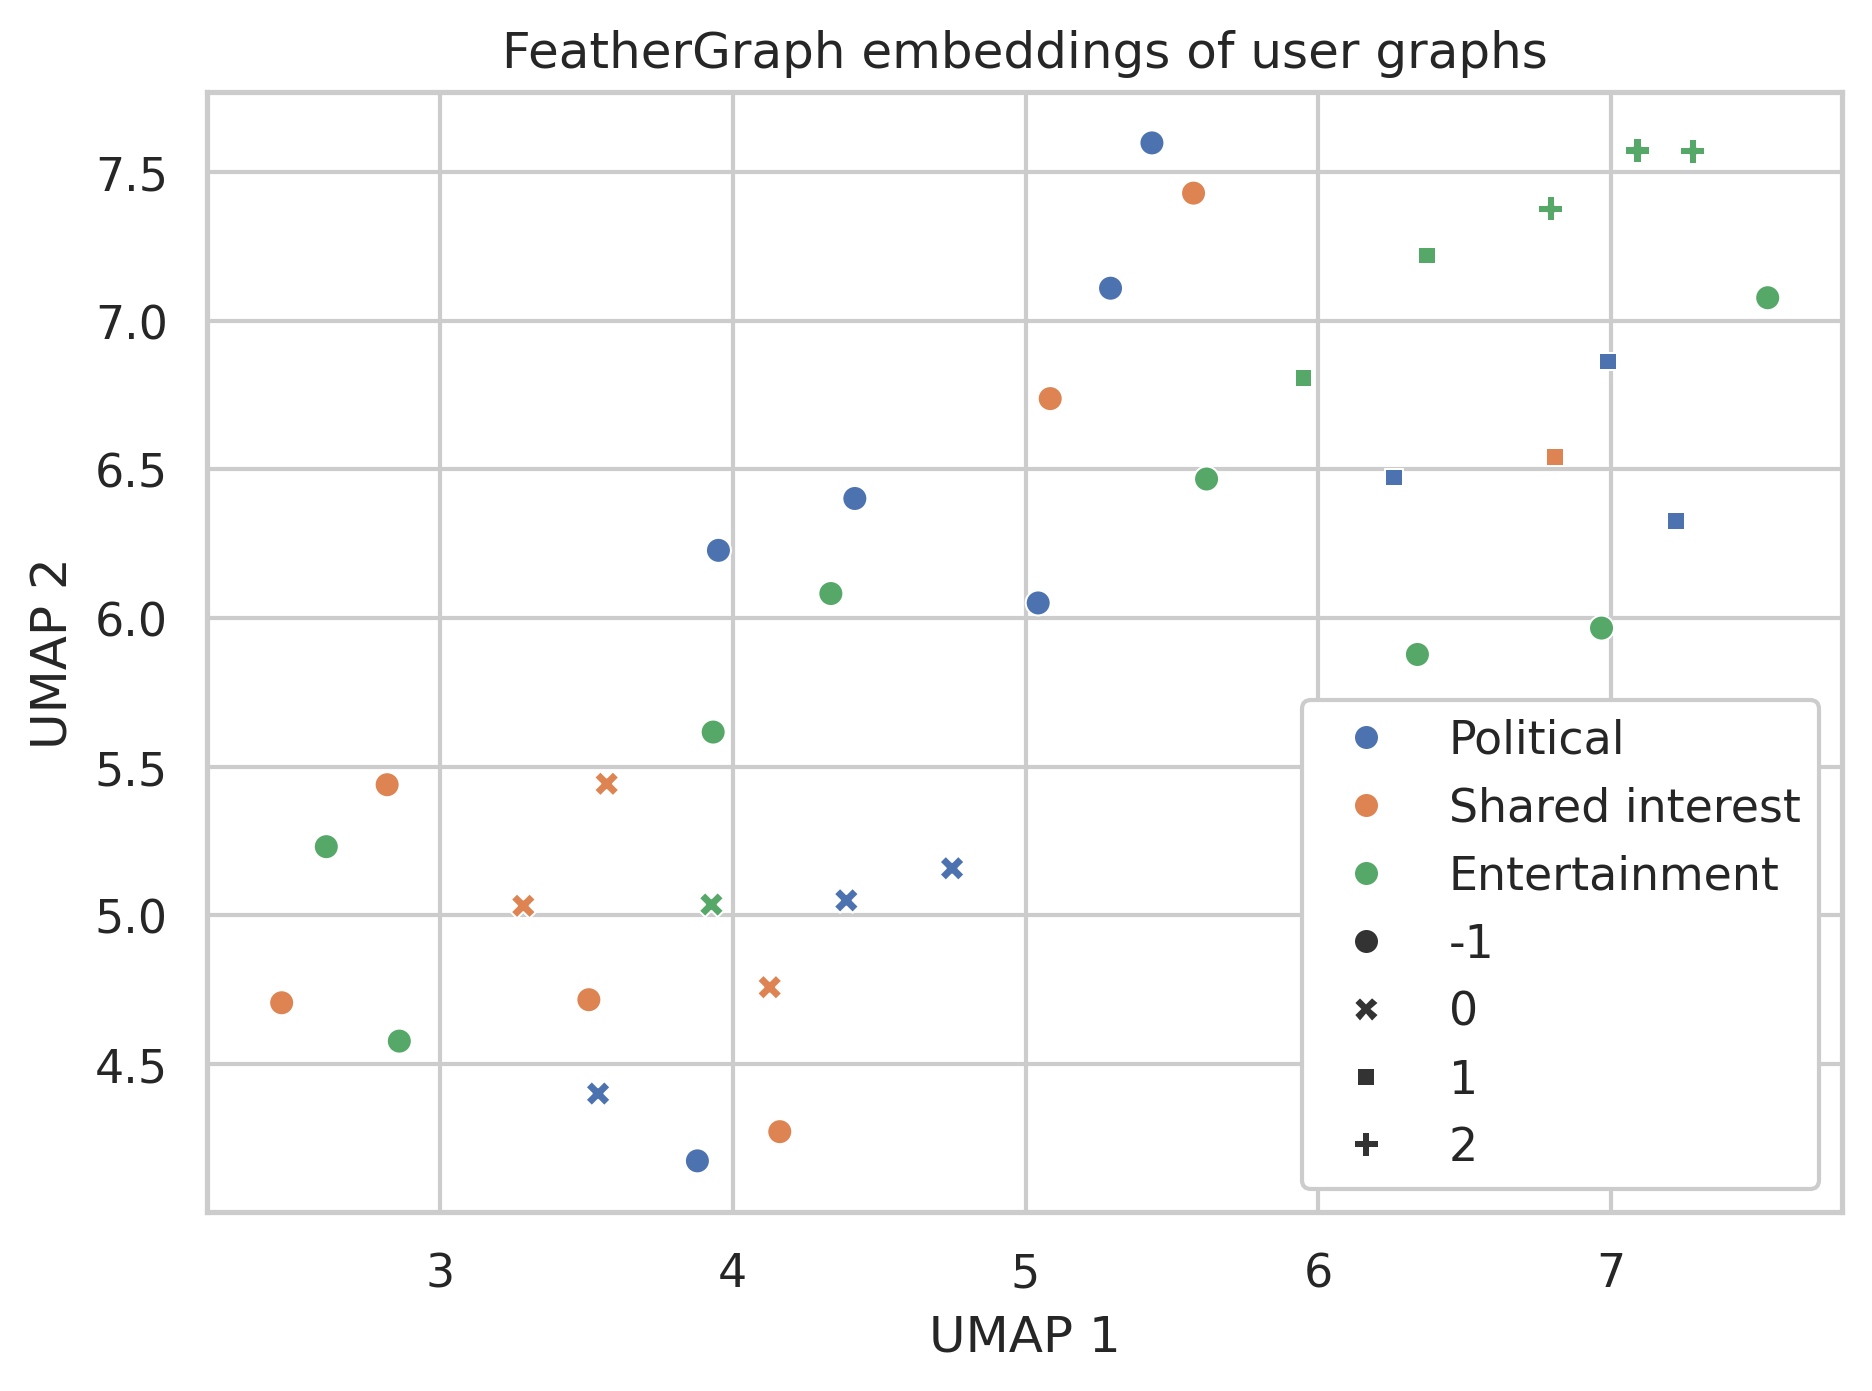

In [6]:
fig, ax = plt.subplots()
sns.scatterplot(x=embs_umap[:, 0], y=embs_umap[:, 1], hue=categories, style=labels, ax=ax)
ax.set_title('FeatherGraph embeddings of user graphs')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

plt.tight_layout()
plt.savefig('../figures/embeddings/feathergraph.pgf', format='pgf', bbox_inches='tight')

### Graph2Vec

In [33]:
model = Graph2Vec(workers=1, seed=42)
model.fit(graphs_nx)
embs = model.get_embedding()
embs_pca = PCA(n_components=2).fit_transform(embs)
embs_umap = UMAP(n_components=2, random_state=42).fit_transform(embs)

/home/mahf/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [34]:
hdbscan = HDBSCAN()
hdbscan.fit(embs)
labels = hdbscan.labels_

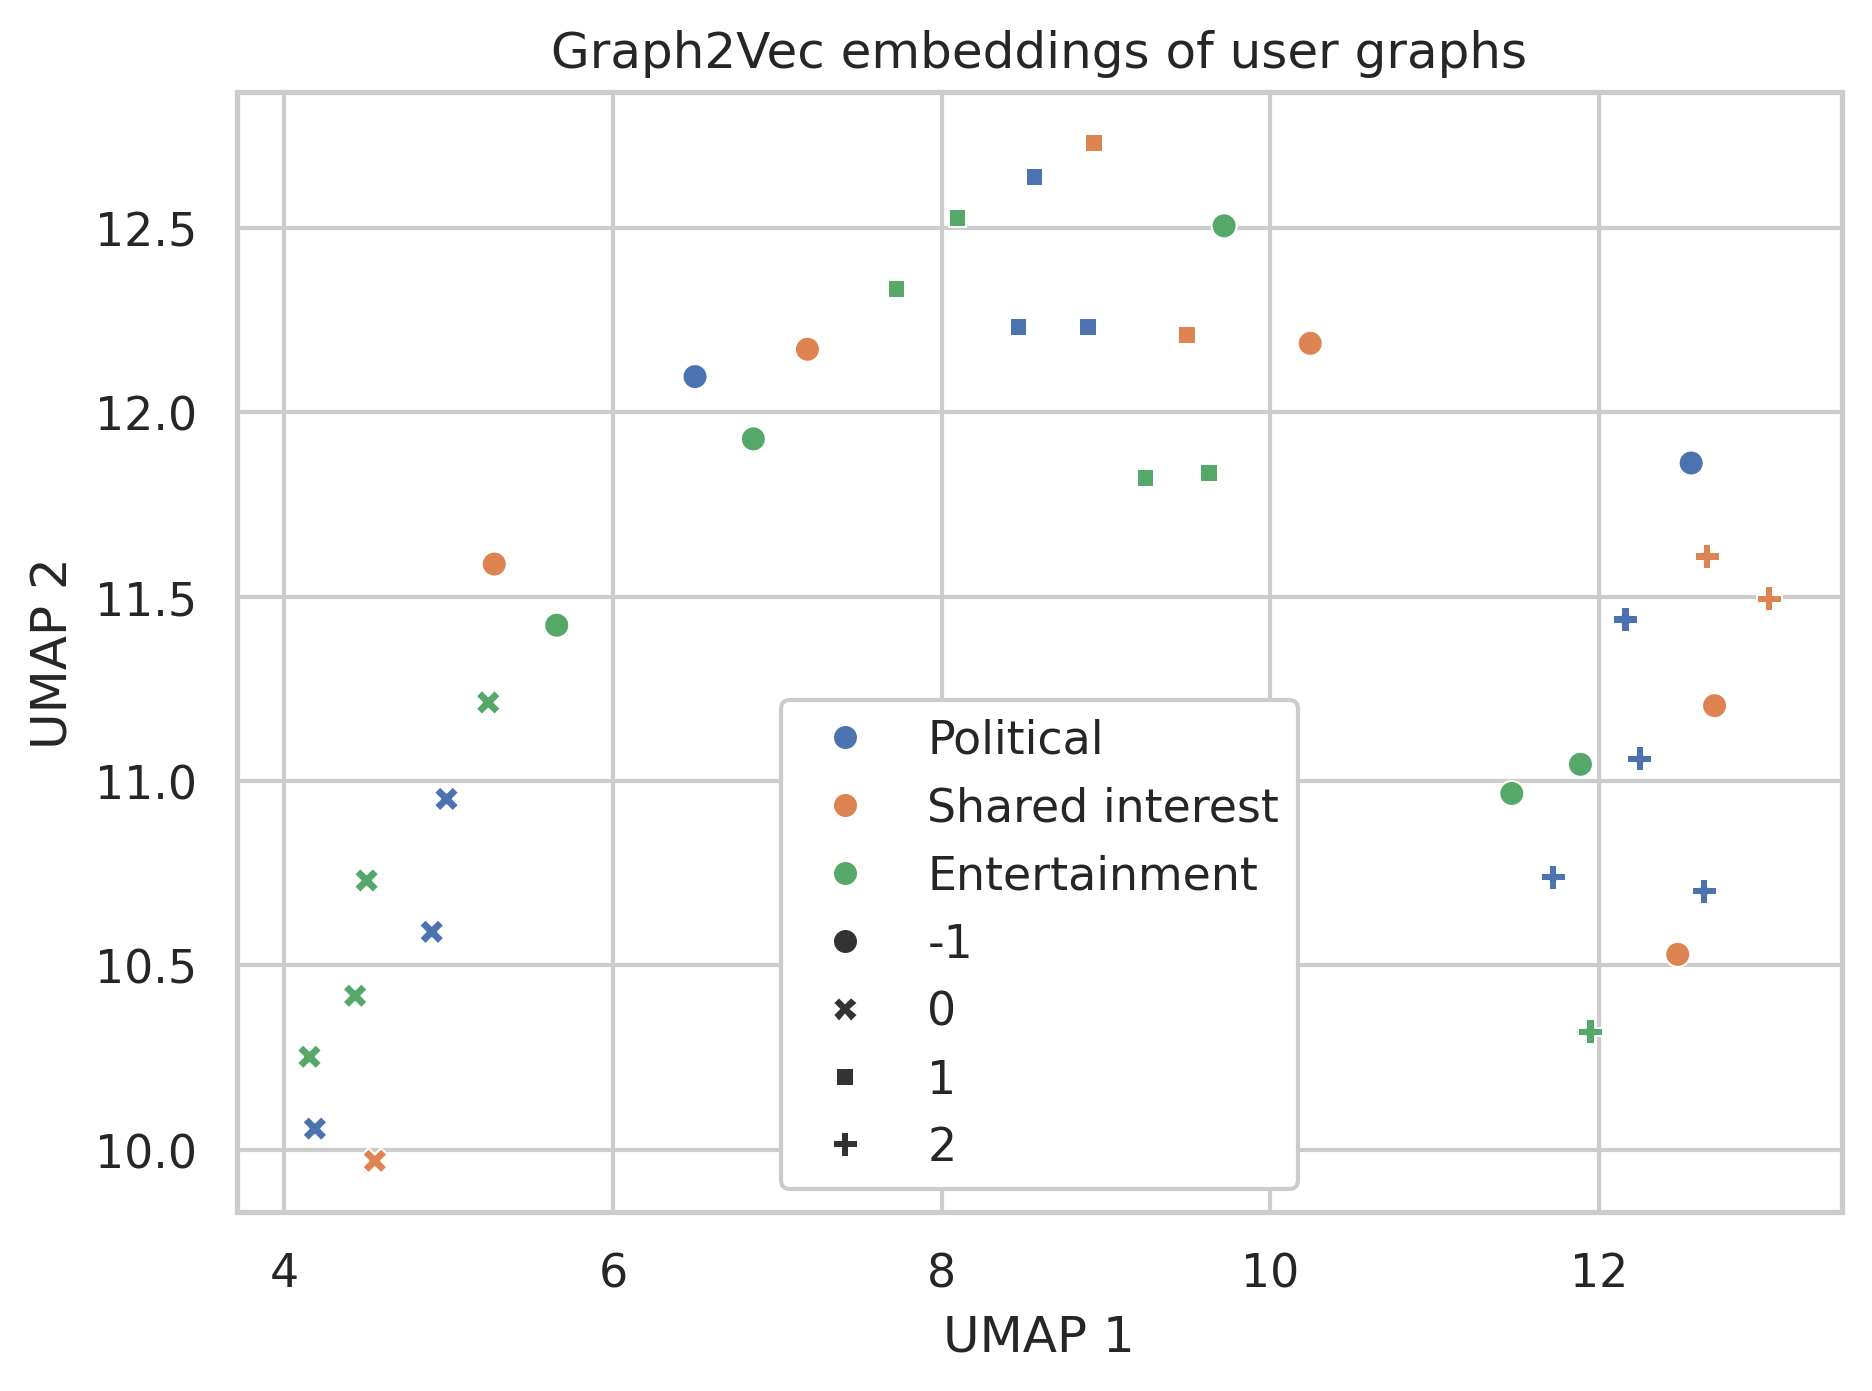

In [35]:
fig, ax = plt.subplots()
sns.scatterplot(x=embs_umap[:, 0], y=embs_umap[:, 1], hue=categories, style=labels, ax=ax)
ax.set_title('Graph2Vec embeddings of user graphs')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

plt.tight_layout()
plt.savefig('../figures/embeddings/graph2vec.pgf', format='pgf', bbox_inches='tight')

### Subgraph embeddings

In [10]:
subgraph_data = json.load(open('../data/fsm/subgraph_data/lcc.json'))

# extract motif matrix
subgraph_matrix = [subgraph['graph_occurrences'] for subgraph in subgraph_data]
embs = np.array(subgraph_matrix, dtype=np.int32).T

# dimensionality reduction
embs_pca = PCA(n_components=2).fit_transform(embs)
embs_umap = UMAP(n_components=2, random_state=42).fit_transform(embs)

/home/mahf/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [11]:
hdbscan = HDBSCAN()
hdbscan.fit(embs)
labels = hdbscan.labels_

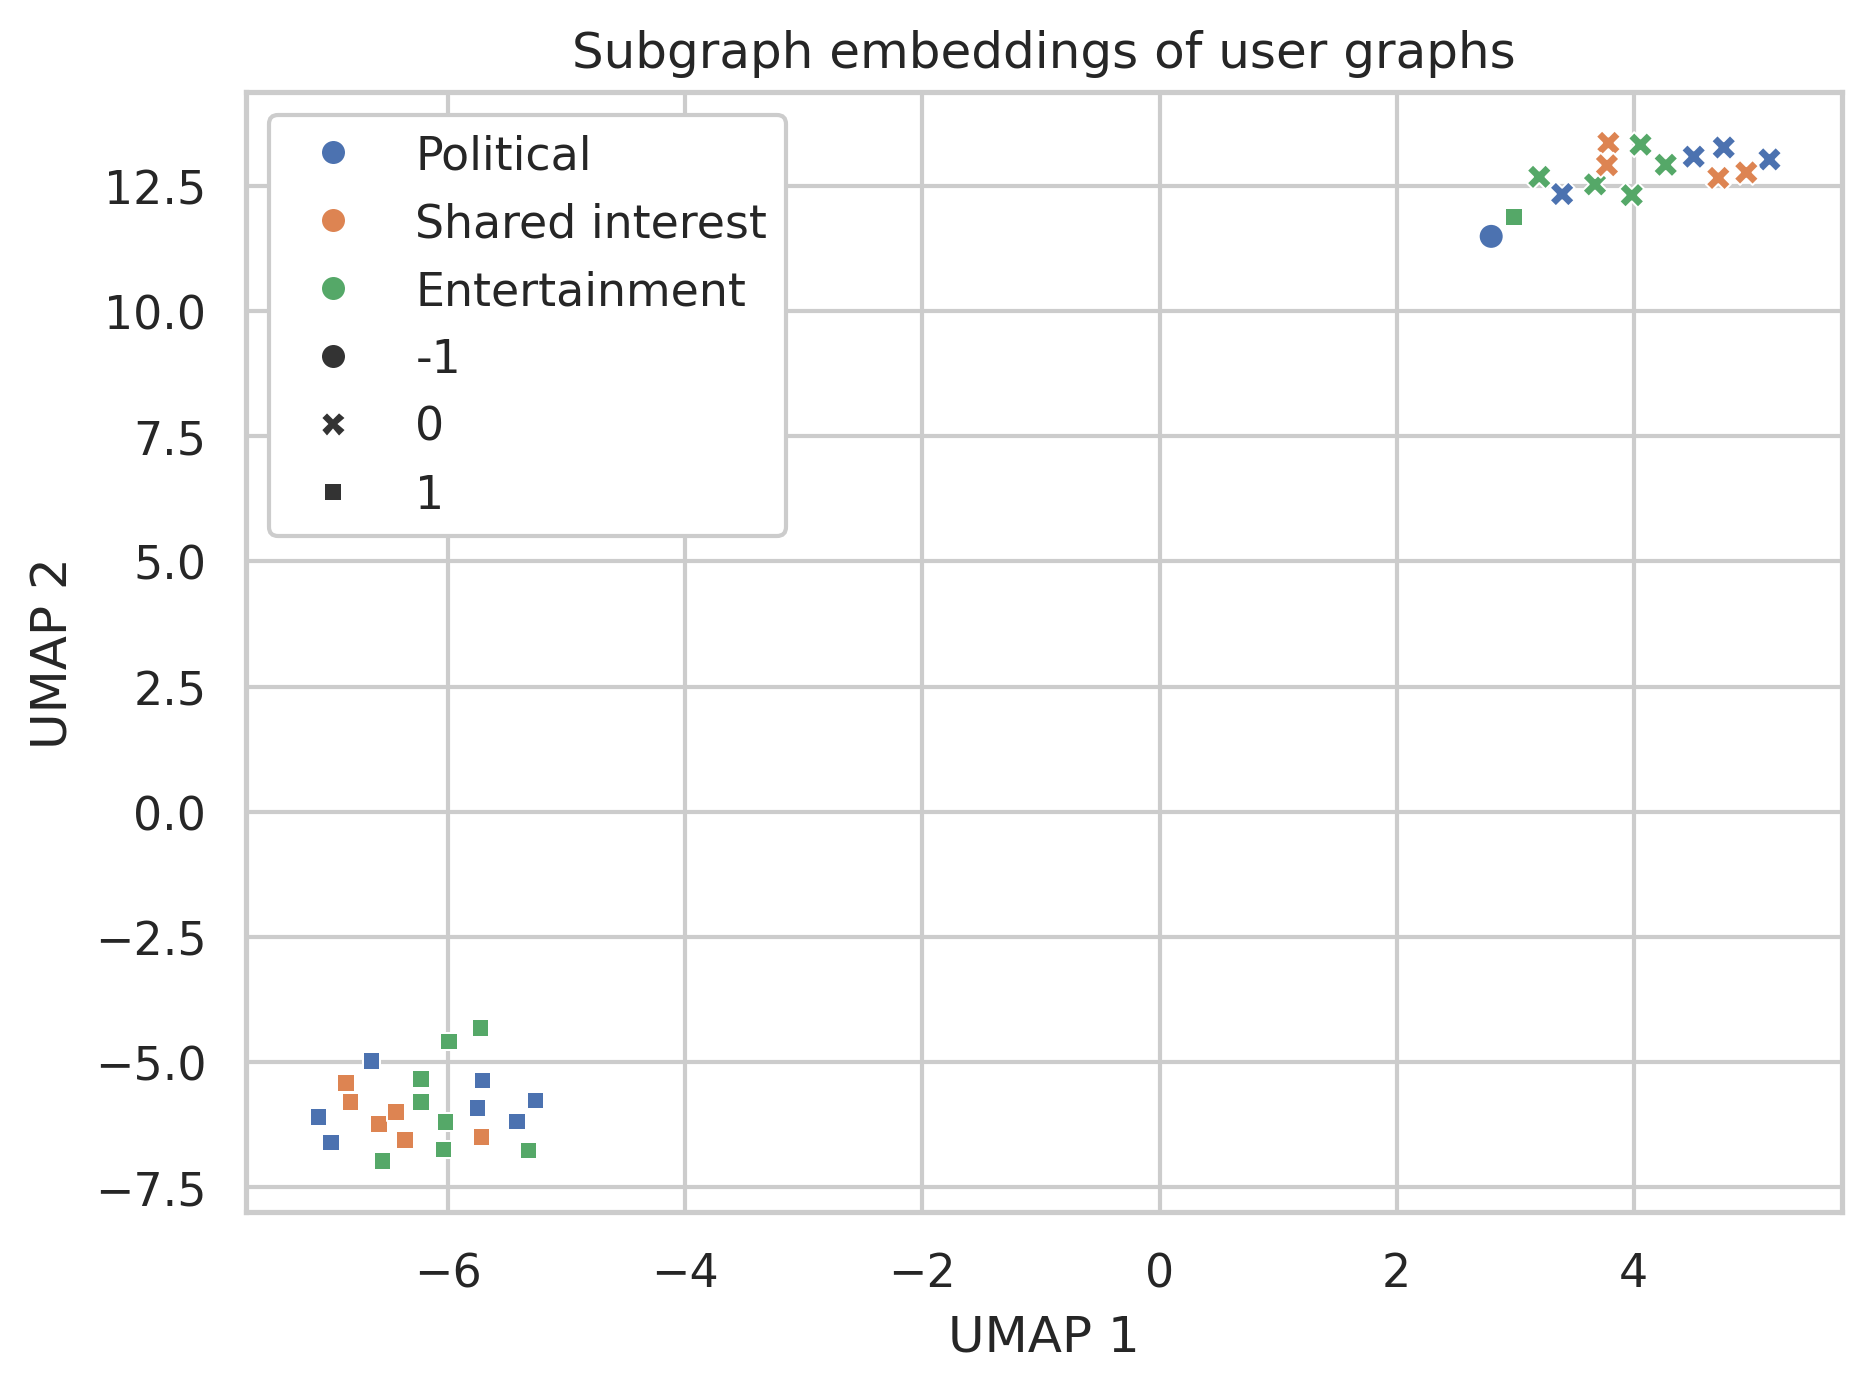

In [12]:
fig, ax = plt.subplots()
sns.scatterplot(x=embs_umap[:, 0], y=embs_umap[:, 1], hue=categories, style=labels, ax=ax)
ax.set_title('Subgraph embeddings of user graphs')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

plt.tight_layout()
plt.savefig('../figures/embeddings/subgraph.pgf', format='pgf', bbox_inches='tight')

### Directed subgraph embeddings

In [13]:
subgraph_data = json.load(open('../data/fsm/subgraph_data/lcc_directed.json'))

# extract motif matrix
subgraph_matrix = [subgraph['graph_occurrences'] for subgraph in subgraph_data]
embs = np.array(subgraph_matrix, dtype=np.int32).T

# dimensionality reduction
embs_pca = PCA(n_components=2).fit_transform(embs)
embs_umap = UMAP(n_components=2, random_state=42).fit_transform(embs)

/home/mahf/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [14]:
hdbscan = HDBSCAN()
hdbscan.fit(embs)
labels = hdbscan.labels_

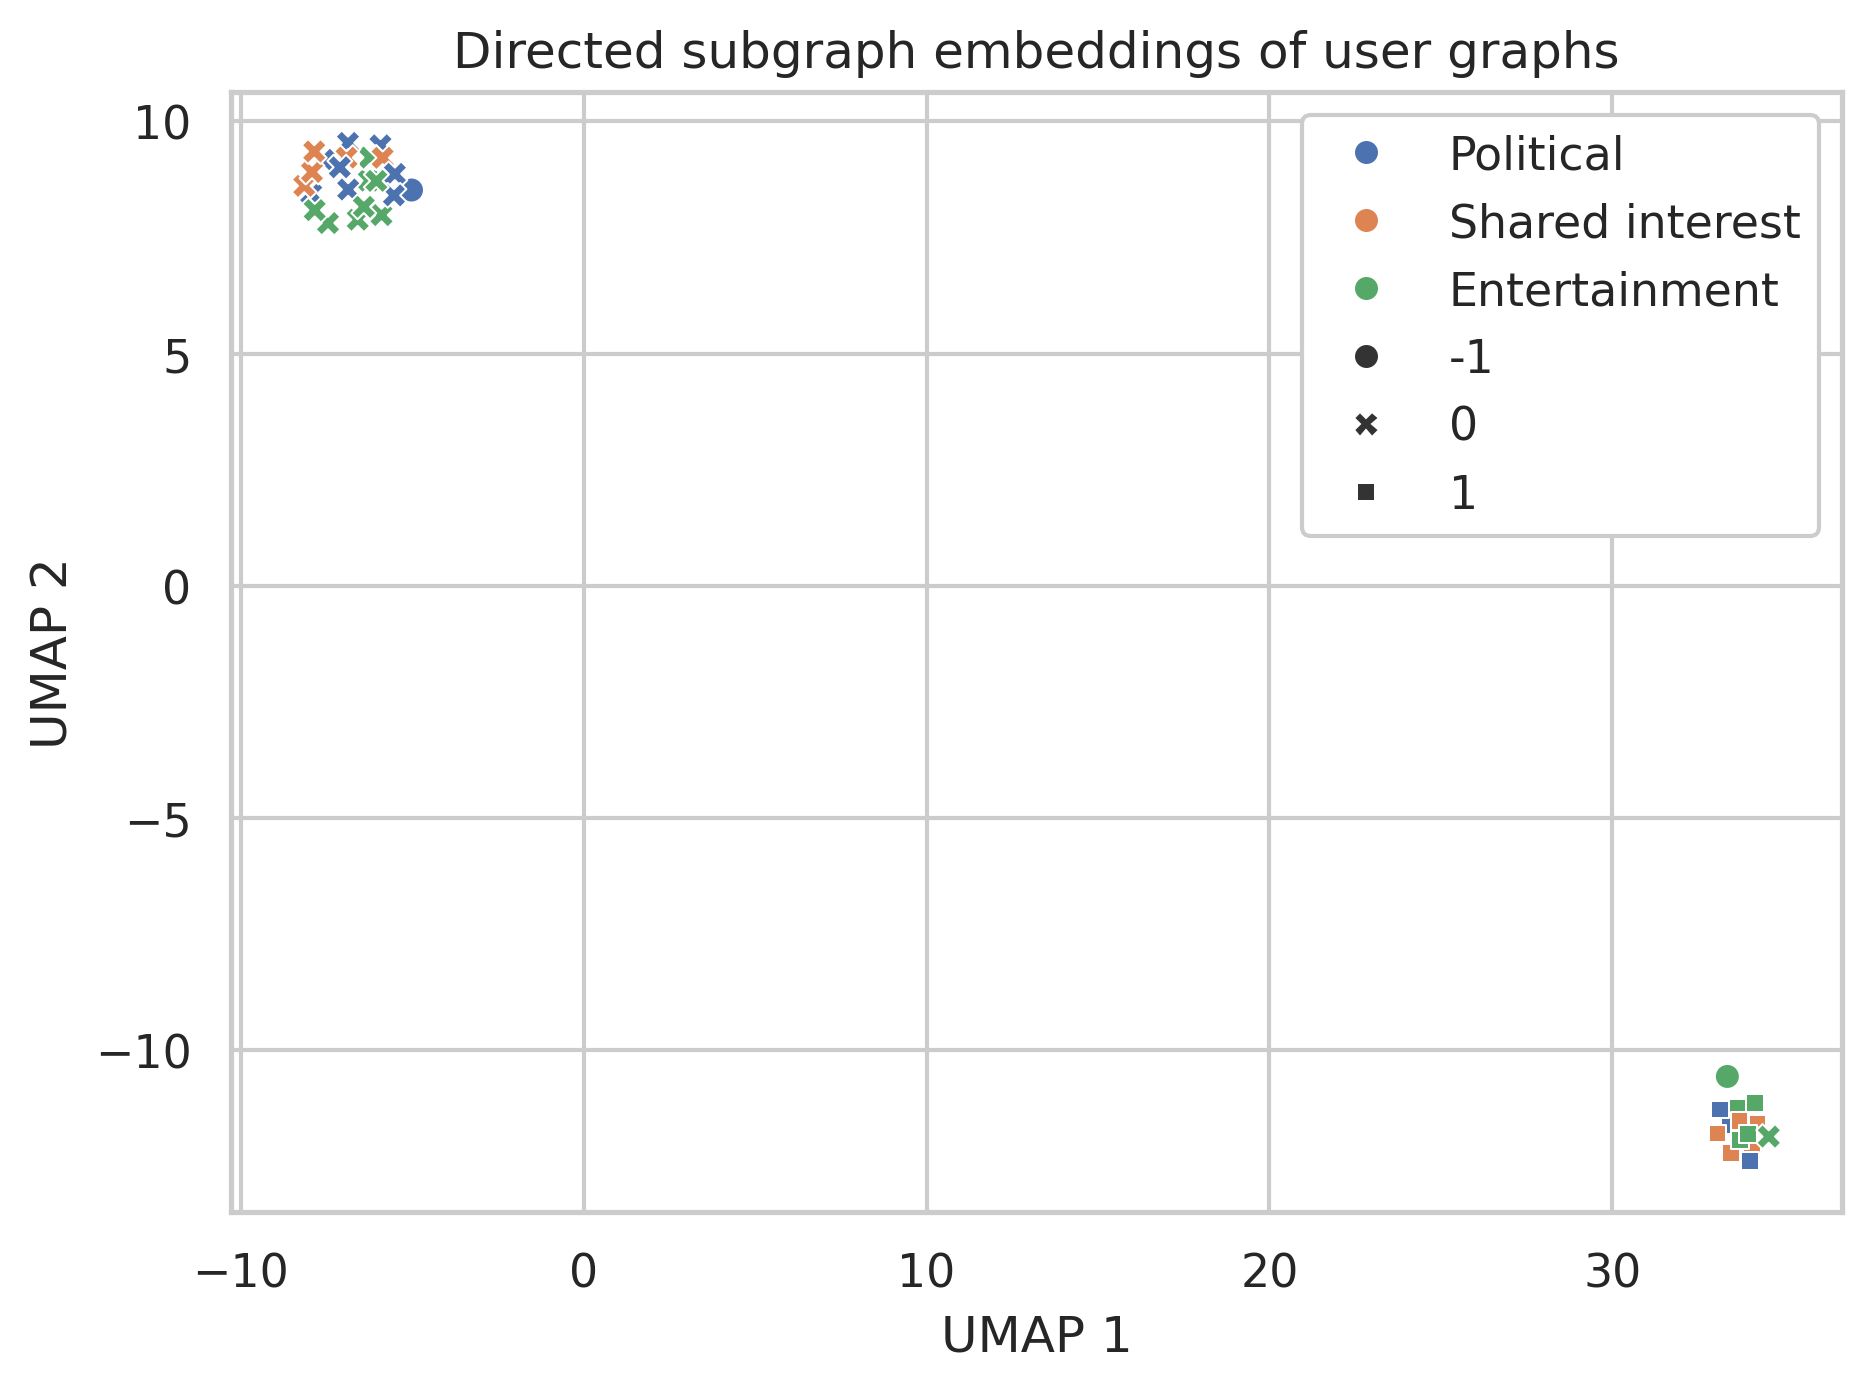

In [15]:
fig, ax = plt.subplots()
sns.scatterplot(x=embs_umap[:, 0], y=embs_umap[:, 1], hue=categories, style=labels, ax=ax)
ax.set_title('Directed subgraph embeddings of user graphs')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

plt.tight_layout()
plt.savefig('../figures/embeddings/directed_subgraph.pgf', format='pgf', bbox_inches='tight')

### Sentiment subgraph embeddings

In [18]:
subgraph_data = json.load(open('../data/fsm/subgraph_data/sentiment_lcc.json'))

# extract motif matrix
subgraph_matrix = [subgraph['graph_occurrences'] for subgraph in subgraph_data]
embs = np.array(subgraph_matrix, dtype=np.int32).T

# dimensionality reduction
embs_pca = PCA(n_components=2).fit_transform(embs)
embs_umap = UMAP(n_components=2, random_state=42).fit_transform(embs)

/home/mahf/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [19]:
hdbscan = HDBSCAN()
hdbscan.fit(embs)
labels = hdbscan.labels_

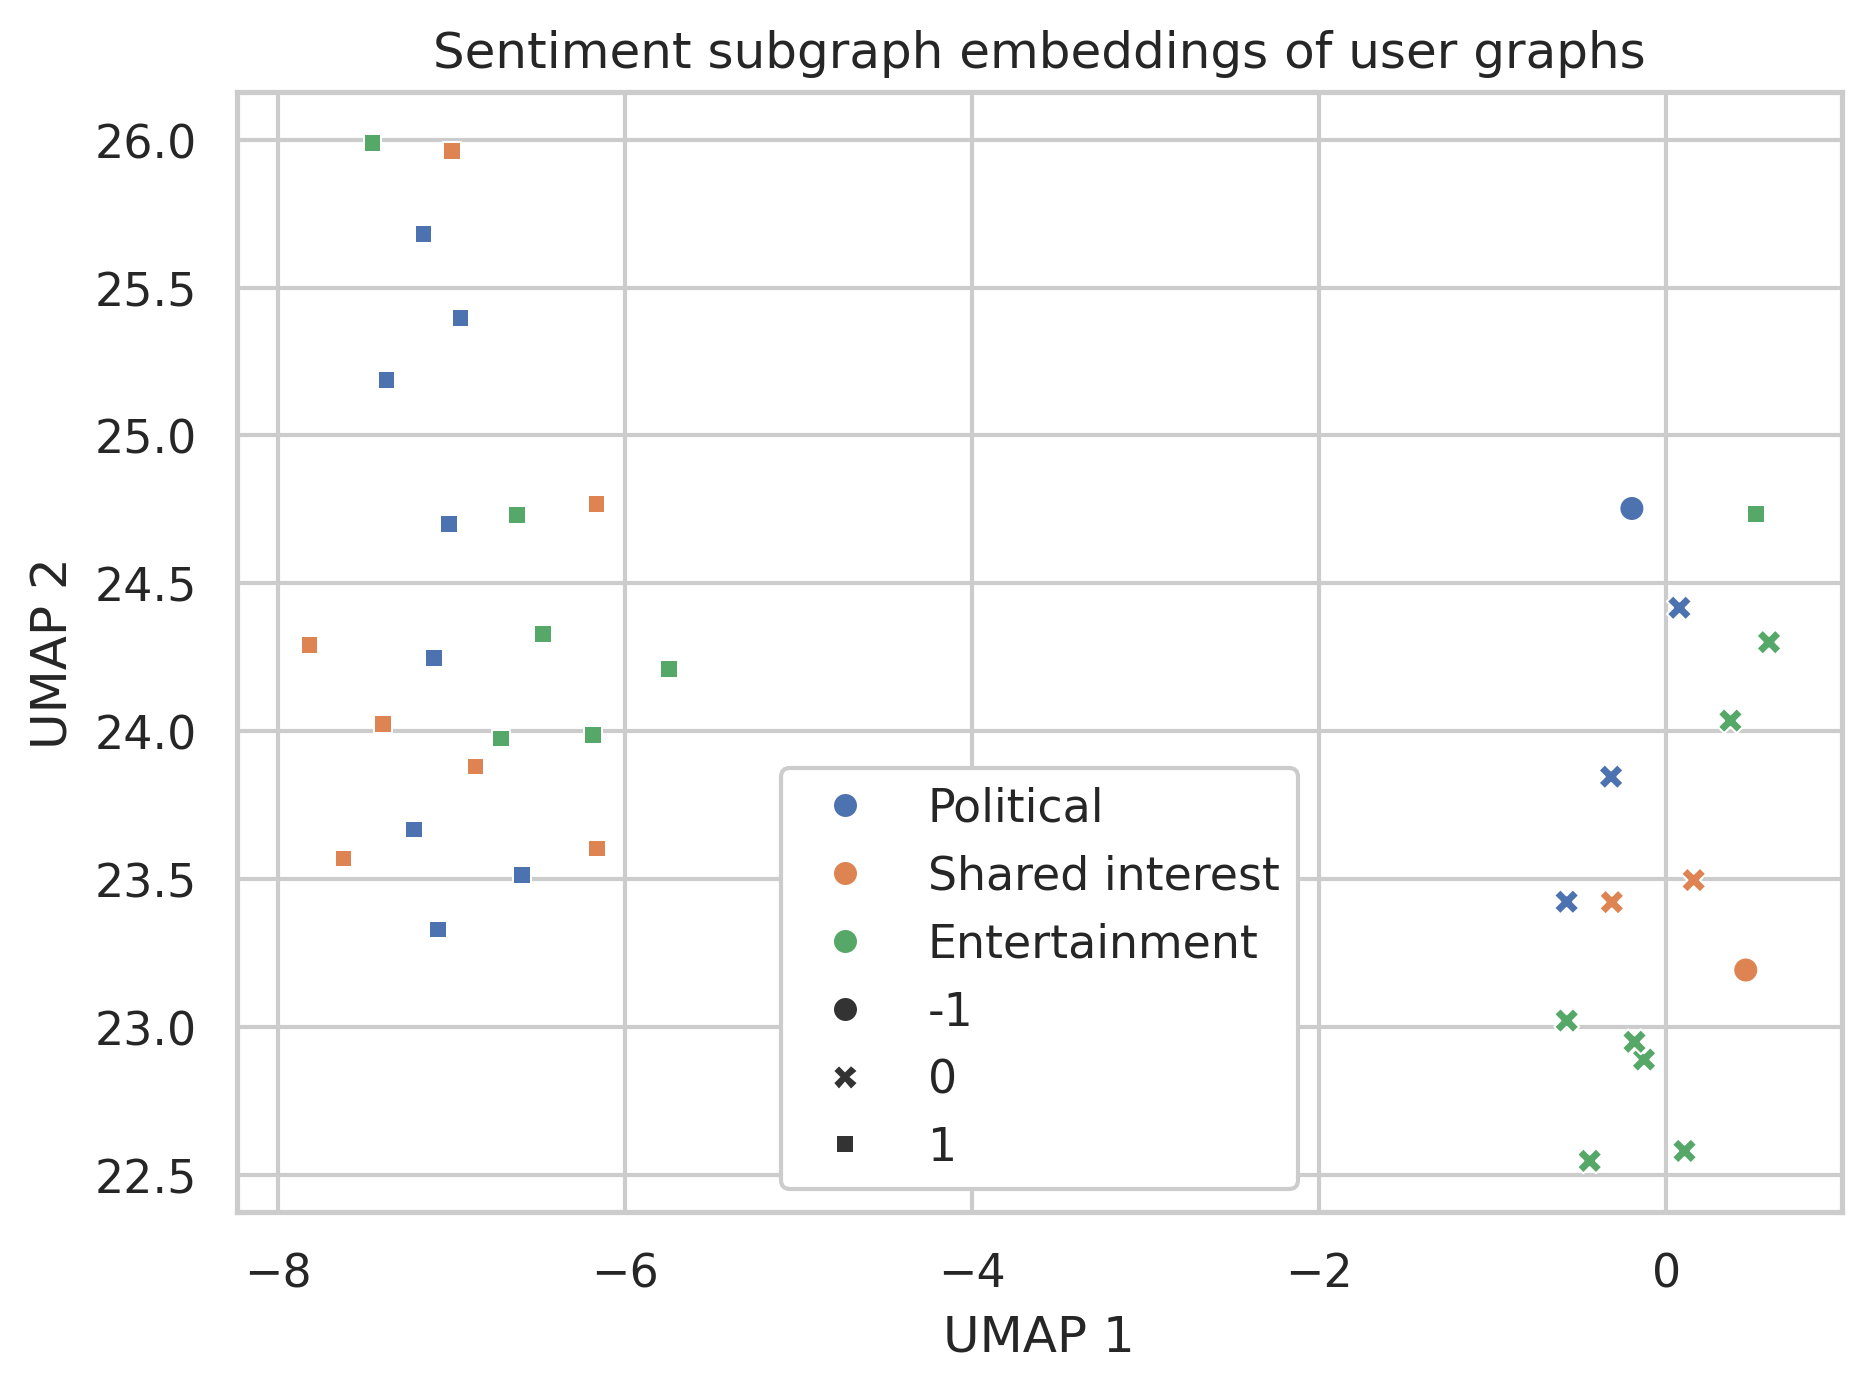

In [20]:
fig, ax = plt.subplots()
sns.scatterplot(x=embs_umap[:, 0], y=embs_umap[:, 1], hue=categories, style=labels, ax=ax)
ax.set_title('Sentiment subgraph embeddings of user graphs')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

plt.tight_layout()
plt.savefig('../figures/embeddings/sentiment_subgraph.pgf', format='pgf', bbox_inches='tight')

### Directed sentiment subgraph embeddings

In [21]:
subgraph_data = json.load(open('../data/fsm/subgraph_data/sentiment_lcc_directed.json'))

# extract motif matrix
subgraph_matrix = [subgraph['graph_occurrences'] for subgraph in subgraph_data]
embs = np.array(subgraph_matrix, dtype=np.int32).T

# dimensionality reduction
embs_pca = PCA(n_components=2).fit_transform(embs)
embs_umap = UMAP(n_components=2, random_state=42).fit_transform(embs)

/home/mahf/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [22]:
hdbscan = HDBSCAN()
hdbscan.fit(embs)
labels = hdbscan.labels_

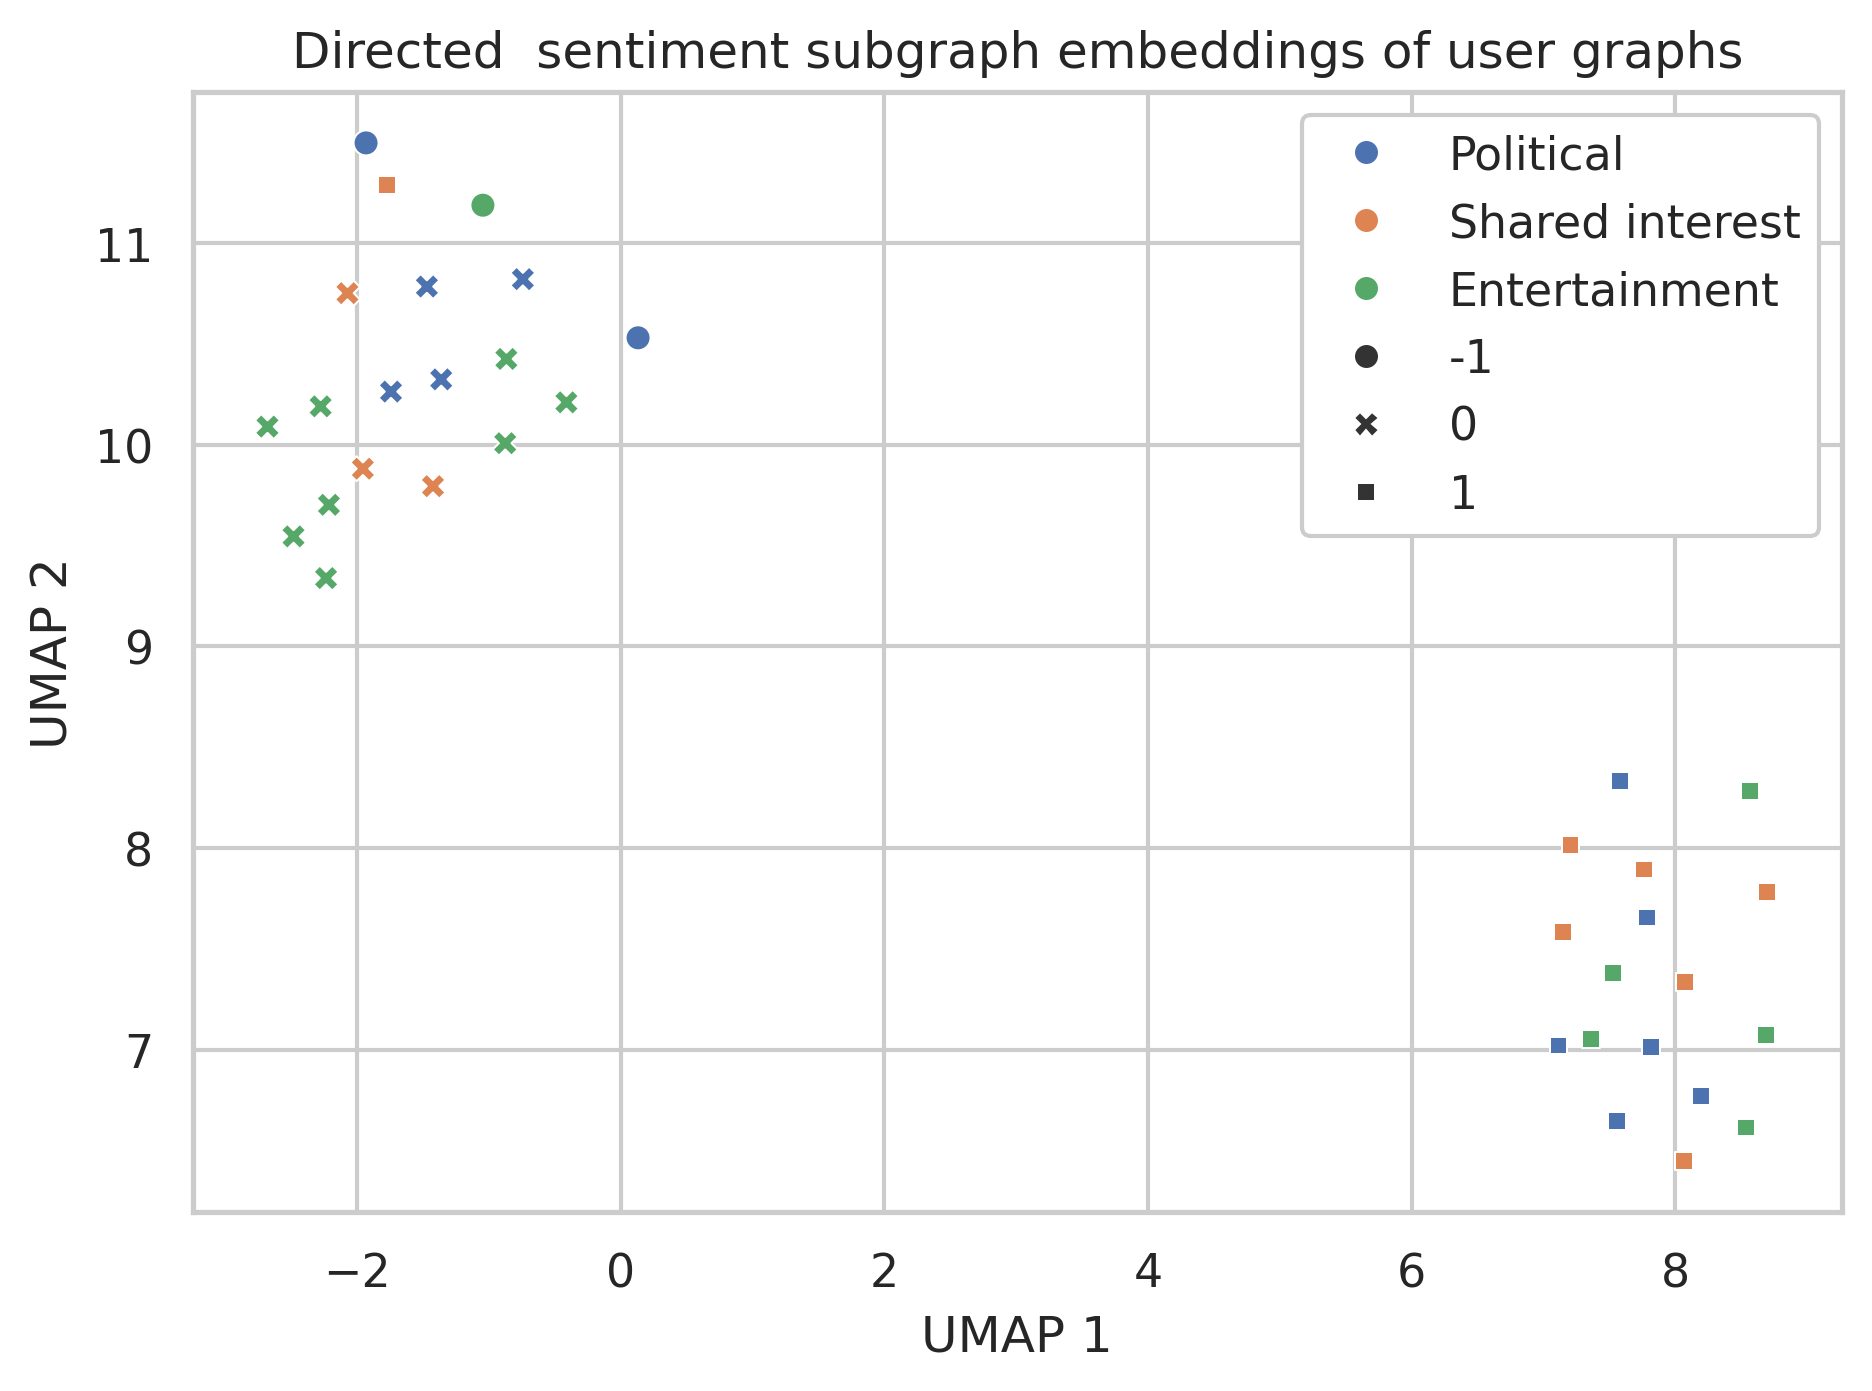

In [23]:
fig, ax = plt.subplots()
sns.scatterplot(x=embs_umap[:, 0], y=embs_umap[:, 1], hue=categories, style=labels, ax=ax)
ax.set_title('Directed  sentiment subgraph embeddings of user graphs')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

plt.tight_layout()
plt.savefig('../figures/embeddings/sentiment_subgraph_directed.pgf', format='pgf', bbox_inches='tight')